In [ ]:
## Import libraries
# We are going to import pandas, a data processing and CSV file I/O library
import pandas as pd
# We also import matplotlib, which is a go-to Python plotting library
import matplotlib.pyplot as plt
# We are also going to import seaborn which is a powerful Python graphing library based on matplotlib optimizes matplotlib's output
import seaborn as sns


In [ ]:
#Load the dataset

url = 'https://raw.githubusercontent.com/m155/DataMining/main/smoking.csv'
df = pd.read_csv(url)

In [ ]:
df.describe().round(2)

,age,height(cm),waist(cm),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,Gtp,smoking
count,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.0,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00
mean,44.18,164.65,82.05,121.49,76.00,99.31,196.9,126.67,57.29,114.96,14.62,0.89,26.18,39.95,0.37
std,12.07,9.19,9.27,13.68,9.68,20.80,36.3,71.64,14.74,40.93,1.56,0.22,19.36,50.29,0.48
min,20.00,130.00,51.00,71.00,40.00,46.00,55.0,8.00,4.00,1.00,4.90,0.10,6.00,1.00,0.00
25%,40.00,160.00,76.00,112.00,70.00,89.00,172.0,74.00,47.00,92.00,13.60,0.80,19.00,17.00,0.00
50%,40.00,165.00,82.00,120.00,76.00,96.00,195.0,108.00,55.00,113.00,14.80,0.90,23.00,25.00,0.00
75%,55.00,170.00,88.00,130.00,82.00,104.00,220.0,160.00,66.00,136.00,15.80,1.00,28.00,43.00,1.00
max,85.00,190.00,129.00,240.00,146.00,505.00,445.0,999.00,618.00,1860.00,21.10,11.60,1311.00,999.00,1.00


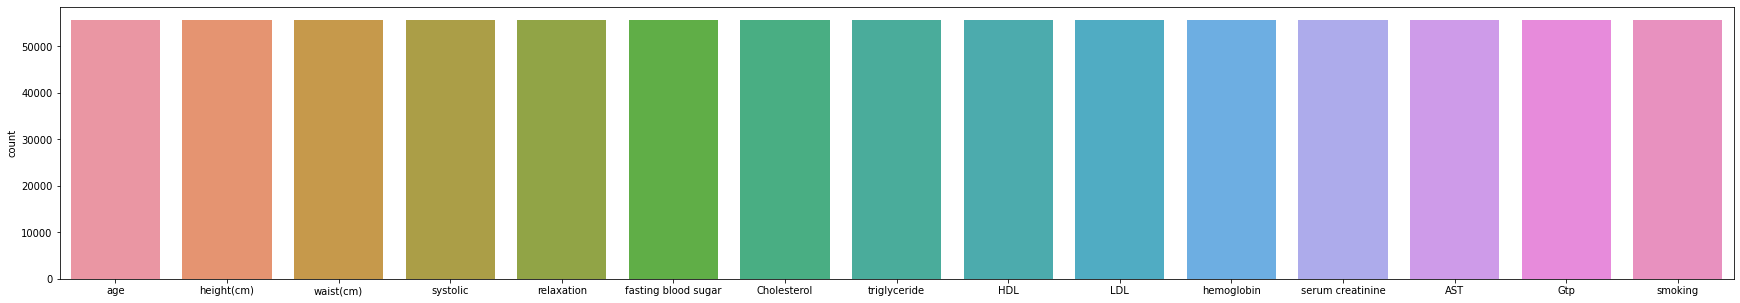

In [ ]:
#Visualize the class distribution using a countplot
plt.figure(figsize=(30,5))
sns.countplot(data = df)
plt.show()

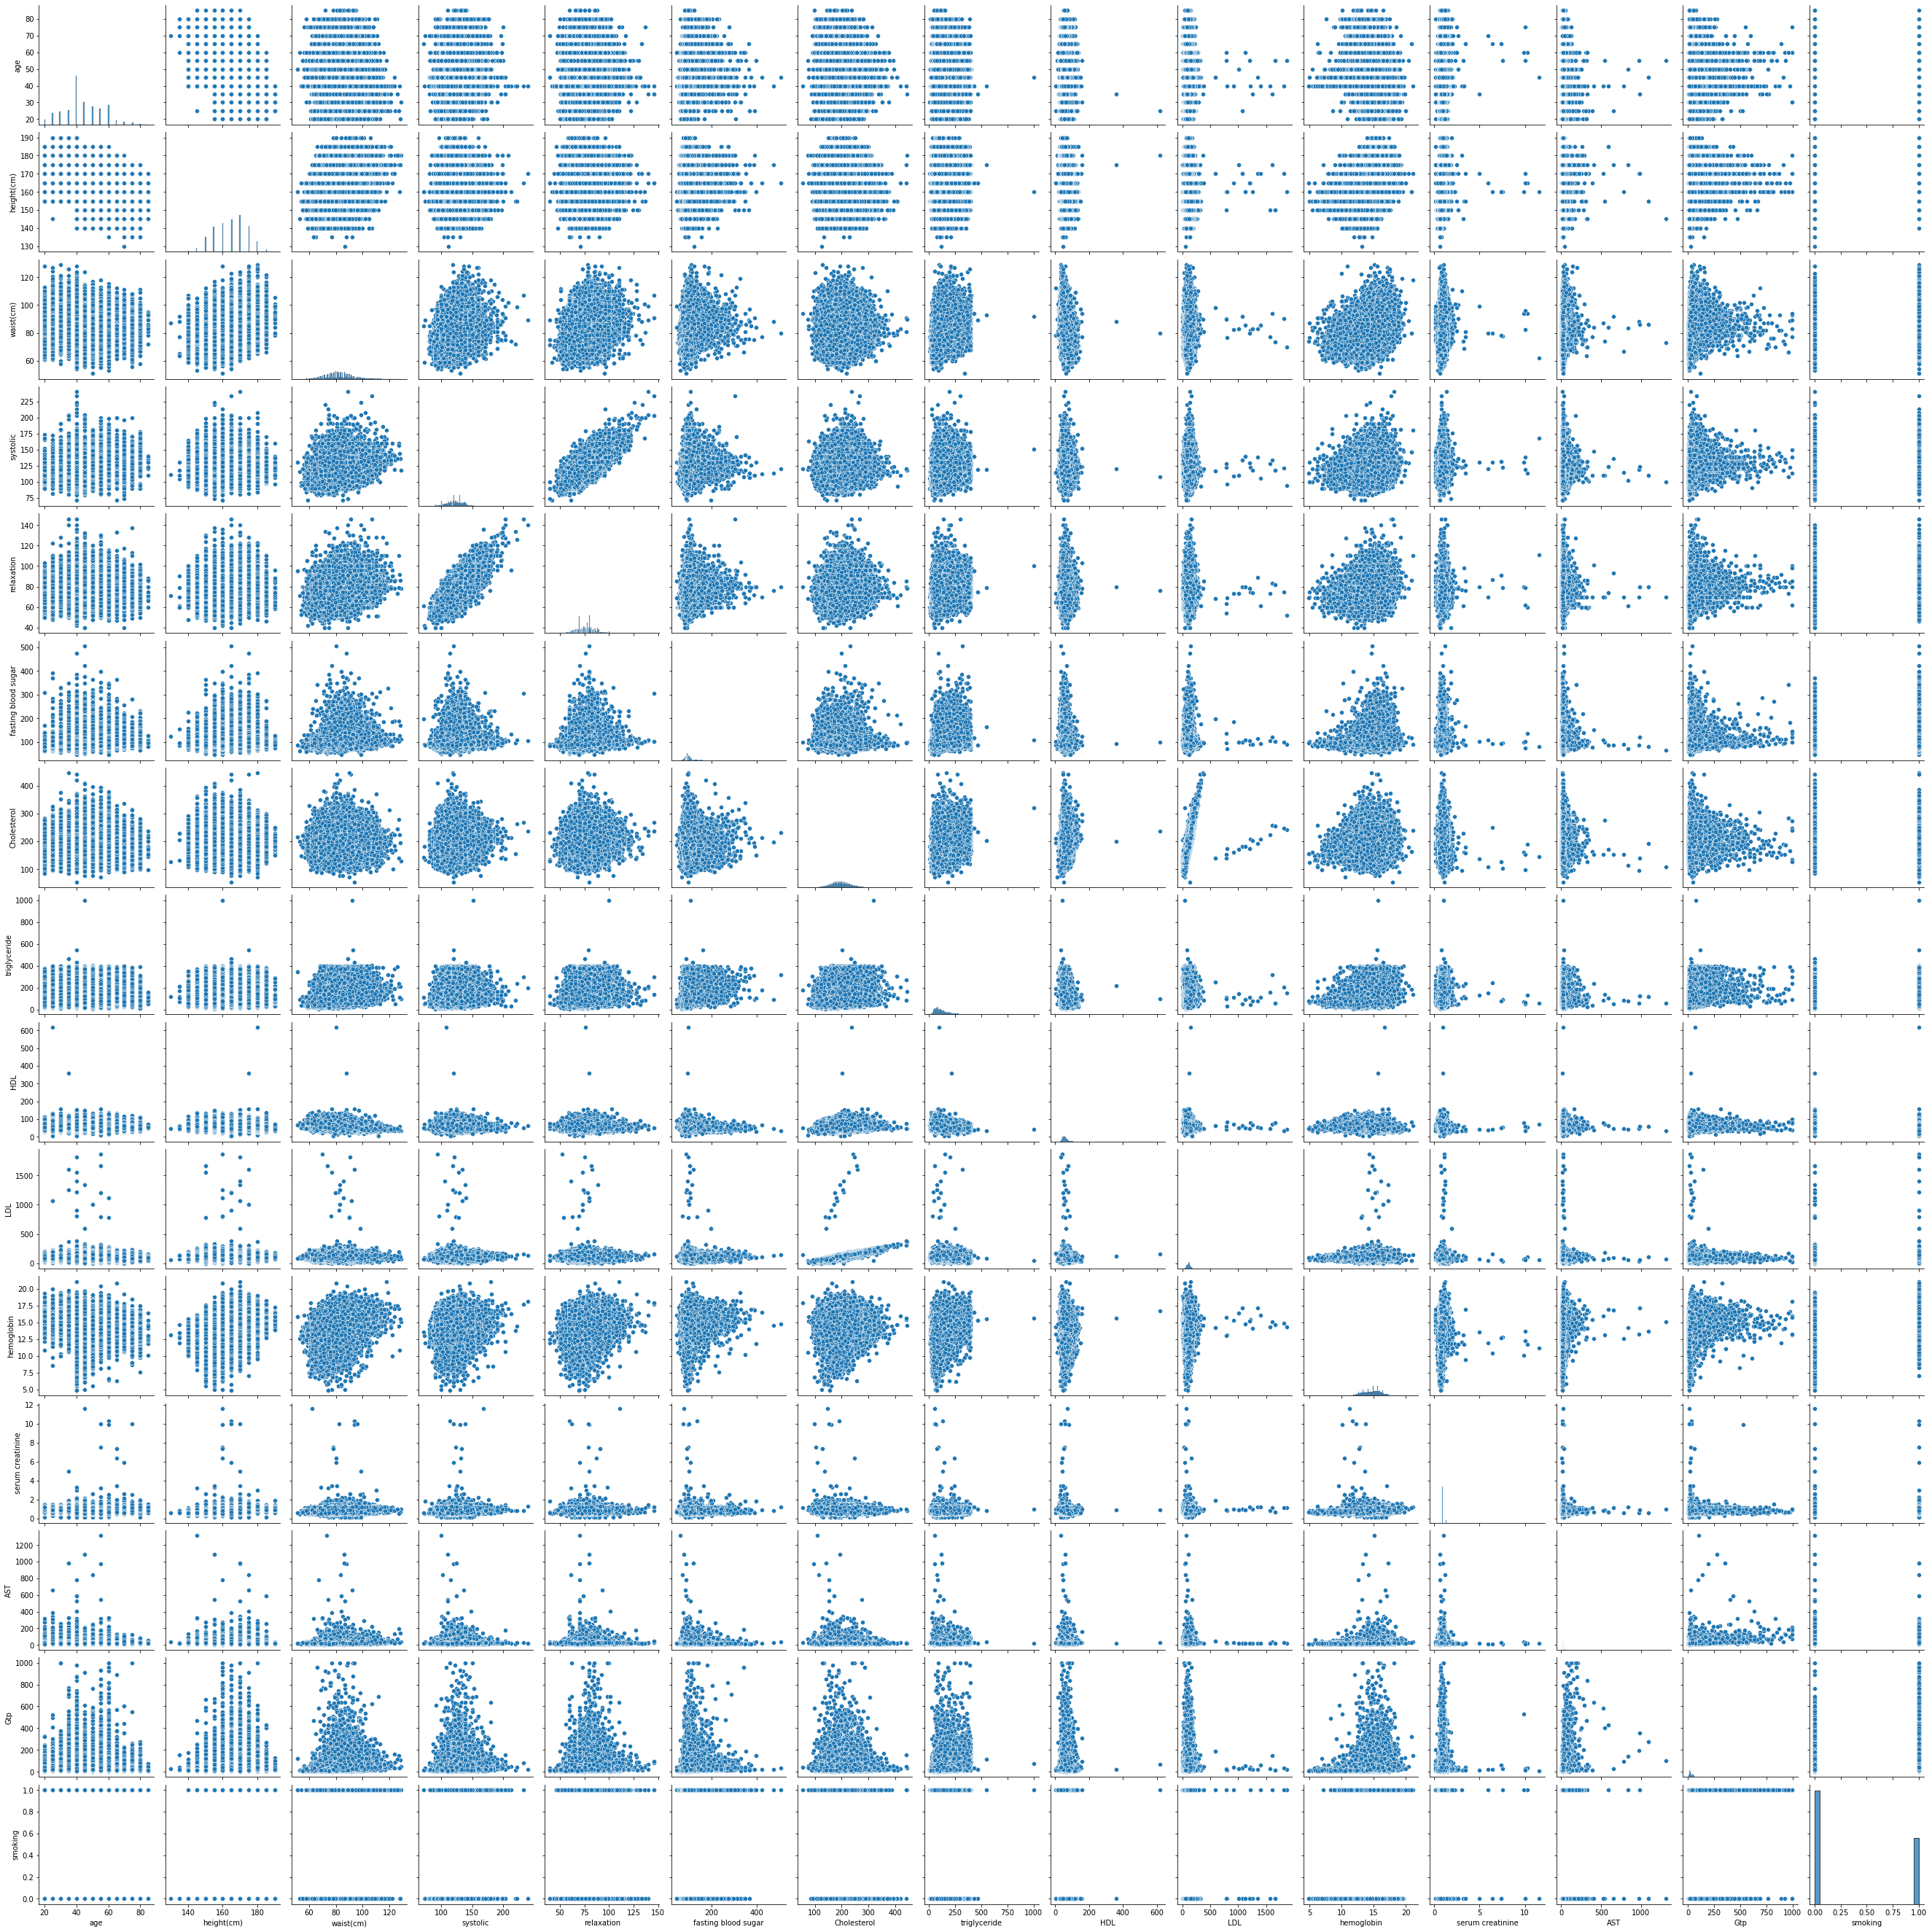

In [ ]:
#Visualize all pairwise relationships
sns.pairplot(df)
plt.show()

In [ ]:
#DataSet Preprocessing
NAs = pd.concat([df.isnull().sum()], axis=1, keys=["df"])
NAs[NAs.sum(axis=1)>0]

for col in df.dtypes[df.dtypes == "object"].index:
  for_dummy = df.pop(col)
  df = pd.concat([df, pd.get_dummies(for_dummy, prefix=col)], axis=1)
df.head()


,age,height(cm),waist(cm),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,Gtp,smoking,gender_F,gender_M,oral_Y
0,40,155,81.3,114,73,94,215,82,73,126,12.9,0.7,18,27,0,1,0,1
1,40,160,81.0,119,70,130,192,115,42,127,12.7,0.6,22,18,0,1,0,1
2,55,170,80.0,138,86,89,242,182,55,151,15.8,1.0,21,22,1,0,1,1
3,40,165,88.0,100,60,96,322,254,45,226,14.7,1.0,19,18,0,0,1,1
4,40,155,86.0,120,74,80,184,74,62,107,12.5,0.6,16,22,0,1,0,1


In [ ]:
labels = df.pop("smoking")


In [ ]:
#Split the dataset into training and test set (train: 75% and test 25%)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, labels, test_size=0.25)

In [ ]:
#Train the following models with the data
#Logistic Regression (LR)
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
lr = make_pipeline(StandardScaler(), LogisticRegression())
lr.fit(x_train, y_train)
LR_pred = lr.predict(x_test)

In [ ]:
#Decision Trees (DT)
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DT_pred = dt.predict(x_test)

In [ ]:
#Gaussian Naive Bayes (NB)
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

NB_pred = nb.predict(x_test)

In [ ]:
#RandomForest Tree Classifier (RF)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RF_pred = rf.predict(x_test)


In [ ]:
#Support Vector Machines (SVM)
from sklearn import svm
sm = svm.SVC(kernel='linear')
sm.fit(x_train, y_train)

SVM_pred = sm.predict(x_test)

In [ ]:
#Estimate the accuracy for each model ====>>>>>>>>>>>>>
#the accuracy for Logistic Regression (LR):
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, LR_pred)
roc_auc_lr = auc(false_positive_rate, true_positive_rate)
roc_auc_lr
print("Accuracy Score For Logistic Regression (LR) :",roc_auc_lr*100)

#the accuracy for Decision Trees (DT):
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, DT_pred)
roc_auc_dt = auc(false_positive_rate, true_positive_rate)
roc_auc_dt
print("Accuracy Score For Decision Trees (DT) :",roc_auc_dt*100)

#the accuracy for Gaussian Naive Bayes (NB):
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, NB_pred)
roc_auc_nb = auc(false_positive_rate, true_positive_rate)
roc_auc_nb
print("Accuracy Score For Gaussian Naive Bayes (NB) :",roc_auc_nb*100)

#the accuracy for RandomForest Tree (RF):
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, RF_pred)
roc_auc_rf = auc(false_positive_rate, true_positive_rate)
roc_auc_rf
print("Accuracy Score For Support RandomForest Tree (RF) :",roc_auc_rf*100)

#the accuracy for Support Vector Machines (SVM):
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, SVM_pred)
roc_auc_svm = auc(false_positive_rate, true_positive_rate)
roc_auc_svm
print("Accuracy Score For Support Vector Machines (SVM) :",roc_auc_svm*100)


Accuracy Score For Logistic Regression (LR) : 72.7090787567661
Accuracy Score For Decision Trees (DT) : 75.96992407130689
Accuracy Score For Gaussian Naive Bayes (NB) : 74.9323490854392
Accuracy Score For Support RandomForest Tree (RF) : 81.1350045333572
Accuracy Score For Support Vector Machines (SVM) : 73.35881515541767


In [ ]:
# Determine the classification report and confusion matrix for the model with the best accuracy
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print("Logistic Regression (LR) classification report: ", '\n', classification_report(y_test, LR_pred))
print("Logistic Regression (LR) confusion matrix report:", '\n', confusion_matrix(y_test, LR_pred))
print("============================================")
print("Decision Trees (DT) classification report: ", '\n', classification_report(y_test, DT_pred))
print("Decision Trees (DT) confusion matrix report:", '\n', confusion_matrix(y_test, DT_pred))
print("============================================")
print("Gaussian Naive Bayes (NB) classification report: ", '\n', classification_report(y_test, NB_pred))
print("Gaussian Naive Bayes (NB) confusion matrix report:", '\n', confusion_matrix(y_test, NB_pred))
print("============================================")
print("RandomForest Tree (RF) classification report: ", '\n', classification_report(y_test, RF_pred))
print("RandomForest Tree (RF) confusion matrix report:", '\n', confusion_matrix(y_test, RF_pred))
print("============================================")
print("Support Vector Machines (SVM) classification report: ", '\n', classification_report(y_test, SVM_pred))
print("Support Vector Machines (SVM) confusion matrix report:", '\n', confusion_matrix(y_test, SVM_pred))


Logistic Regression (LR) classification report:  
               precision    recall  f1-score   support

           0       0.81      0.77      0.79      8916
           1       0.63      0.68      0.65      5007

    accuracy                           0.74     13923
   macro avg       0.72      0.73      0.72     13923
weighted avg       0.75      0.74      0.74     13923

Logistic Regression (LR) confusion matrix report: 
 [[6863 2053]
 [1580 3427]]
Decision Trees (DT) classification report:  
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      8916
           1       0.69      0.69      0.69      5007

    accuracy                           0.78     13923
   macro avg       0.76      0.76      0.76     13923
weighted avg       0.78      0.78      0.78     13923

Decision Trees (DT) confusion matrix report: 
 [[7359 1557]
 [1532 3475]]
Gaussian Naive Bayes (NB) classification report:  
               precision    recall  f1-score 

In [ ]:
# Determmine cross-validation to evaluate the model's performance with the CV score (mean and std).
from sklearn.model_selection import cross_val_score
#Logistic Regression (LR) cross-validation:
scores_LR = cross_val_score(lr, x_test, y_test, cv=5)
scores_LR
print("Logistic Regression (LR):", "%0.2f accuracy with a standard deviation of %0.2f" % (scores_LR.mean(), scores_LR.std()))
#Decision Trees (DT) cross-validation:
scores_DT = cross_val_score(dt, x_test, y_test, cv=5)
scores_DT
print("Decision Trees (DT):", "%0.2f accuracy with a standard deviation of %0.2f" % (scores_DT.mean(), scores_DT.std()))
#Gaussian Naive Bayes (NB) cross-validation:
scores_NB = cross_val_score(nb, x_test, y_test, cv=5)
scores_NB
print("Gaussian Naive Bayes (NB):", "%0.2f accuracy with a standard deviation of %0.2f" % (scores_NB.mean(), scores_NB.std()))
#RandomForest Tree (RF) cross-validation:
scores_RF = cross_val_score(rf, x_test, y_test, cv=5)
scores_RF
print("RandomForest Tree (RF):", "%0.2f accuracy with a standard deviation of %0.2f" % (scores_RF.mean(), scores_RF.std()))
#Support Vector Machines (SVM) cross-validation:
scores_SMV = cross_val_score(sm, x_test, y_test, cv=5)
scores_SMV
print("Support Vector Machines (SVM):", "%0.2f accuracy with a standard deviation of %0.2f" % (scores_SMV.mean(), scores_SMV.std()))


Logistic Regression (LR): 0.73 accuracy with a standard deviation of 0.00
Decision Trees (DT): 0.71 accuracy with a standard deviation of 0.01
Gaussian Naive Bayes (NB): 0.70 accuracy with a standard deviation of 0.01
RandomForest Tree (RF): 0.76 accuracy with a standard deviation of 0.01
Support Vector Machines (SVM): 0.73 accuracy with a standard deviation of 0.00
